# Exercise 2: Maximum a Posteriori Estimation With Gradient Ascent

Write a computer program finding the most likely size of the food item $\phi$ for the situation described in Exercise 1. Initialize $\phi=v_p$, and then find its values in the next 5 time units (you can use Euler’s method, i.e. update 
$$\phi(t + \Delta t)=\phi (t)+\Delta t \frac{\partial{F}}{\partial{\phi}}$$ with $\Delta t = 0.01$.

$$\frac{\partial{F}}{\partial{\phi}} = \frac{v_p-\phi}{\Sigma_p} + \frac{u-g(\phi)}{\Sigma_u} g'(\phi)$$

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time

## Parameters

In [2]:
u = 2 # light intensity data point
sigma_u = 1 # sigma likelihood
v_p = 3 # mean of prior distribution
sigma_p = 1 # sigma for prior


## Gradient function

In [3]:
def gradient(phi, u, v_p, sigma_p, sigma_u):
    return ((v_p - phi)/sigma_p) + (((u - phi**2)/sigma_u)*2*phi)
    

## Gradient ascent

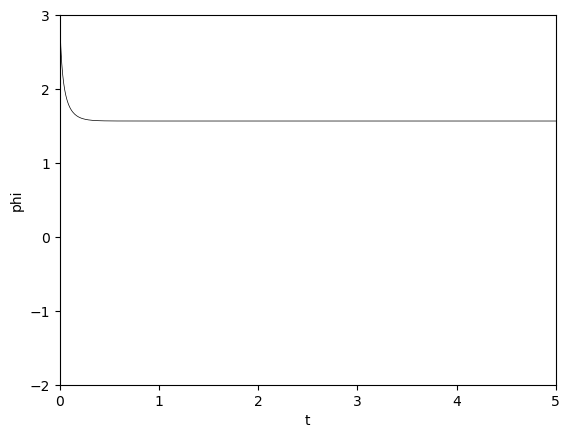

In [4]:
phi_init = v_p 
dt = 0.01
tmax = 5
t = 0
phi_list = []
t_list = []


while t <= tmax:
    if t == 0:
        phi_current = phi_init
    else:
        phi_current = phi_current + dt*gradient(phi_current, u, v_p, sigma_p, sigma_u)

    phi_list.append(phi_current)
    t_list.append(t)
    t += dt


fig, ax = plt.subplots()
ax.set_xlim([0, tmax])
ax.set_ylim([-2, 3])
plt.ylabel('phi')
plt.xlabel('t')
ax.plot(t_list, phi_list, color = 'black', linewidth=0.5)
plt.show()


## The function converges to the MAP

In [5]:
phi_list[-1]

1.567468374852423